In [ ]:
!conda install -c conda-forge requests aiohttp -y

In [ ]:
import os,sys
sys.version
import aiohttp
from timer import timer
from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor

In [ ]:
# %%time
import asyncio


URL='https://httpbin.org/uuid'

async def getdata(session,URL):
    async with session.get(URL) as response:
        responsefromserver = await response.json()
        print(responsefromserver['uuid'])


async def sample():
    # with requests.Session() as session:
    #     with ThreadPoolExecutor(max_workers=50) as executor:
    #         executor.map(getdata, [session]*100, [URL]*100)
    # with Pool() as pref:
    #     with requests.Session() as s:
    #         pref.starmap(getdata,[(s,URL) for _ in range(100)])
    for inx,item in enumerate(range(100)):
        async with aiohttp.Session() as s:
            tasks=[getdata(s,URL) for _ in range(100)]
            await asyncio.gather(*tasks)
            #  print(f'index {inx}-->{getdata(s,URL)}')

@timer(1,1)
def funcproc():
    asyncio.run(sample())


### Jina Base OPS

In [ ]:
from jina import Document,DocumentArray
import os
import sys
import glob
import time
import random
import datetime

In [ ]:
# !pip list | grep 'jina'
# !python -m jina auth login -f
# !python -m jina --version
# !python -m pip install ipywidgets
# !python -m pip install tensorflow
# !python -m pip install "finetuner[full]"

In [ ]:
imdb=DocumentArray().pull('tll-train-da',show_progress=True,local_cache=True)

In [ ]:
imdb.save('image_info_large.bin')

In [ ]:
import matplotlib.pyplot as plt
# plt.imshow(imdb[4].tensor)
imdb[4]

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram",show=False) as gdb:
    EC2("web")

gdb    

\Workflow is a pipeline where data is flow between various services' size too small for label
\Workflow is a pipeline where data is flow between various services' size too small for label
\Workflow is a pipeline where data is flow between various services' size too small for label


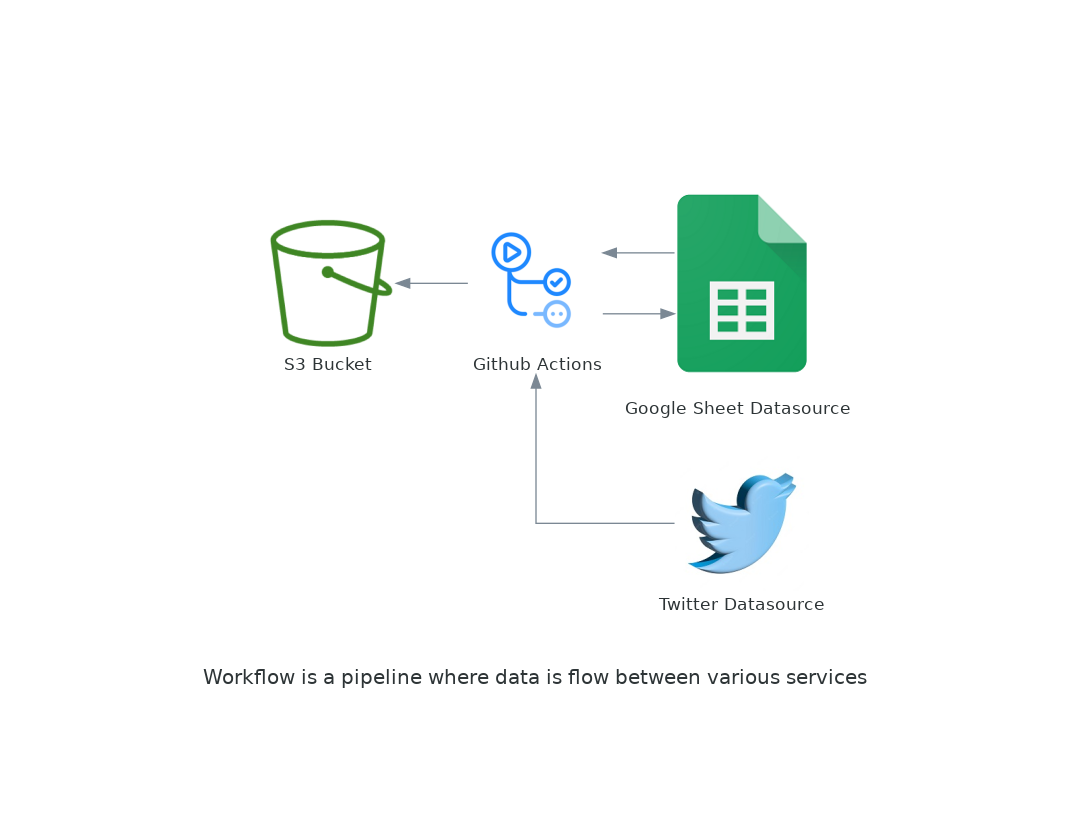

In [22]:
from diagrams import Diagram, Cluster
from diagrams.custom import Custom
from diagrams.aws.storage import SimpleStorageServiceS3Bucket

with Diagram("\r\r\Workflow is a pipeline where data is flow between various services", show=False, filename="custom_local", direction="LR") as gdb:
    
  cc_tweet = Custom('Twitter Datasource','./images/tweet_icon.jpg')
  cc_google_sheet = Custom('\r\rGoogle Sheet Datasource ','./images/Google_Sheets_logo.png')
  cc_git_actions = Custom(' Github Actions','./images/github_actions.png')  
  s3 = SimpleStorageServiceS3Bucket(label="S3 Bucket")

  cc_google_sheet << cc_git_actions << cc_tweet

  s3 <<  cc_git_actions << cc_google_sheet 

gdb